#  Project :  Wrangle and Analyze Data



<ul>
<li><a href="#intro"><b>Introduction</b></a></li>
<li><a href="#gather"><b>Gathering Data</b></a>
    <ul>
        <li><a href="#archive">Twitter Archive</a></li>
        <li><a href="#predictions">Image Predictions File</a></li>
        <li><a href="#json">Additional Data via the Twitter API</a></li>
    </ul>
<li><a href="#assess"><b>Assessing Data</b></a>
    <ul>
        <li><a href="#archive_assess">Assessing the Twitter Archive Data</a></li>
        <li><a href="#predictions_assess">Assessing the Image Predictions Data</a></li>
        <li><a href="#api">Assessing the Twitter API Data</a></li>
        <li><a href="#quality">Quality</a></li>
        <li><a href="#tidiness">Tidiness</a></li>
    </ul>
<li><a href="#clean"><b>Cleaning Data</b></a></li>
<li><a href="#analysis"><b>Analyzing & Visualizing Data</b></a></li>
<li><a href="#conclusion"><b>Conclusions</b></a></li>
<li><a href="#resources"><b>Resources</b></a></li>
</ul>

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my wrangling efforts in this Jupyter Notebook.Tha data analysis and visualizations are done using Python (and its libraries).

The dataset that I will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog.

#### The following packages (i.e. libraries) need to be installed.

- pandas
- numpy
- requests
- tweepy
- json

## Importing libraries

In [4]:
## Importing all the libraries 
import pandas as pd 
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import json
import seaborn as sns
from functools import reduce
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from IPython.display import Image

%matplotlib inline

<a id='gather'></a>
## Gathering Data

- **Twitter Archive :**  This file can be downloaded from the link given in the portal.The WeRateDogs Twitter archive contains basic tweet data(tweet ID, timestamp, text, etc.)for all 5000+ of their tweets, but not everything. 

- **Image Predictions File :**   Indicates what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
       
- **Additional Data via the Twitter API :** Using the tweet IDs in the WeRateDogs Twitter archive, we can query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file.

<a id='archive'></a>
**1.Twitter archive file**
- In this section we read the given csv file and take a look at the first five rows.

In [2]:
#Read CSV file 
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


<a id='predictions'></a>
**2.Image Predictions File**
- Fetching the data from the given url using requests library,read that tsv file and displaying the first five rows.

In [3]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<a id='json'></a>
**3.Additional Data Via Twitter API**
- Gathering data from Twitter API in the form of a JSON file.
  Then read that JSON file line by line to get the tweet_id,favourite_count & retweet_count and finally display it in the form of a data frame.

In [5]:
import tweepy
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)
tweet_ids = twitter_archive_df.tweet_id.values

count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805

Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807

Success
1032: 745422732645535745
Success
1033: 745314880350101504
Success
1034: 745074613265149952
Success
1035: 745057283344719872
Success
1036: 744995568523612160
Success
1037: 744971049620602880
Success
1038: 744709971296780288
Success
1039: 744334592493166593
Success
1040: 744234799360020481
Success
1041: 744223424764059648
Success
1042: 743980027717509120
Success
1043: 743895849529389061
Success
1044: 743835915802583040
Success
1045: 743609206067040256
Success
1046: 743595368194129920
Success
1047: 743545585370791937
Success
1048: 743510151680958465
Success
1049: 743253157753532416
Success
1050: 743222593470234624
Success
1051: 743210557239623680
Success
1052: 742534281772302336
Success
1053: 742528092657332225
Success
1054: 742465774154047488
Success
1055: 742423170473463808
Success
1056: 742385895052087300
Success
1057: 742161199639494656
Success
1058: 742150209887731712
Success
1059: 741793263812808706
Success
1060: 741743634094141440
Success
1061: 741438259667034112
Success
10

Success
1281: 708834316713893888
Success
1282: 708810915978854401
Success
1283: 708738143638450176
Success
1284: 708711088997666817
Success
1285: 708479650088034305
Success
1286: 708469915515297792
Success
1287: 708400866336894977
Success
1288: 708356463048204288
Success
1289: 708349470027751425
Success
1290: 708149363256774660
Success
1291: 708130923141795840
Success
1292: 708119489313951744
Success
1293: 708109389455101952
Success
1294: 708026248782585858
Success
1295: 707995814724026368
Success
1296: 707983188426153984
Success
1297: 707969809498152960
Success
1298: 707776935007539200
Success
1299: 707741517457260545
Success
1300: 707738799544082433
Success
1301: 707693576495472641
Success
1302: 707629649552134146
Success
1303: 707610948723478529
Success
1304: 707420581654872064
Success
1305: 707411934438625280
Success
1306: 707387676719185920
Success
1307: 707377100785885184
Success
1308: 707315916783140866
Success
1309: 707297311098011648
Success
1310: 707059547140169728
Success
13

Success
1530: 690248561355657216
Success
1531: 690021994562220032
Success
1532: 690015576308211712
Success
1533: 690005060500217858
Success
1534: 689999384604450816
Success
1535: 689993469801164801
Success
1536: 689977555533848577
Success
1537: 689905486972461056
Success
1538: 689877686181715968
Success
1539: 689835978131935233
Success
1540: 689661964914655233
Success
1541: 689659372465688576
Success
1542: 689623661272240129
Success
1543: 689599056876867584
Success
1544: 689557536375177216
Success
1545: 689517482558820352
Success
1546: 689289219123089408
Success
1547: 689283819090870273
Success
1548: 689280876073582592
Success
1549: 689275259254616065
Success
1550: 689255633275777024
Success
1551: 689154315265683456
Success
1552: 689143371370250240
Success
1553: 688916208532455424
Success
1554: 688908934925697024
Success
1555: 688898160958271489
Success
1556: 688894073864884227
Success
1557: 688828561667567616
Success
1558: 688804835492233216
Success
1559: 688789766343622656
Success
15

Success
1779: 677895101218201600
Success
1780: 677716515794329600
Success
1781: 677700003327029250
Success
1782: 677698403548192770
Success
1783: 677687604918272002
Success
1784: 677673981332312066
Success
1785: 677662372920729601
Success
1786: 677644091929329666
Success
1787: 677573743309385728
Success
1788: 677565715327688705
Success
1789: 677557565589463040
Success
1790: 677547928504967168
Success
1791: 677530072887205888
Success
1792: 677335745548390400
Success
1793: 677334615166730240
Success
1794: 677331501395156992
Success
1795: 677328882937298944
Success
1796: 677314812125323265
Success
1797: 677301033169788928
Success
1798: 677269281705472000
Success
1799: 677228873407442944
Success
1800: 677187300187611136
Success
1801: 676975532580409345
Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
18

Success
2028: 671874878652489728
Success
2029: 671866342182637568
Success
2030: 671855973984772097
Success
2031: 671789708968640512
Success
2032: 671768281401958400
Success
2033: 671763349865160704
Success
2034: 671744970634719232
Success
2035: 671743150407421952
Success
2036: 671735591348891648
Success
2037: 671729906628341761
Success
2038: 671561002136281088
Success
2039: 671550332464455680
Success
2040: 671547767500775424
Success
2041: 671544874165002241
Success
2042: 671542985629241344
Success
2043: 671538301157904385
Success
2044: 671536543010570240
Success
2045: 671533943490011136
Success
2046: 671528761649688577
Success
2047: 671520732782923777
Success
2048: 671518598289059840
Success
2049: 671511350426865664
Success
2050: 671504605491109889
Success
2051: 671497587707535361
Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
20

Success
2277: 667443425659232256
Success
2278: 667437278097252352
Success
2279: 667435689202614272
Success
2280: 667405339315146752
Success
2281: 667393430834667520
Success
2282: 667369227918143488
Success
2283: 667211855547486208
Success
2284: 667200525029539841
Success
2285: 667192066997374976
Success
2286: 667188689915760640
Success
2287: 667182792070062081
Success
2288: 667177989038297088
Success
2289: 667176164155375616
Success
2290: 667174963120574464
Success
2291: 667171260800061440
Success
2292: 667165590075940865
Success
2293: 667160273090932737
Success
2294: 667152164079423490
Success
2295: 667138269671505920
Success
2296: 667119796878725120
Success
2297: 667090893657276420
Success
2298: 667073648344346624
Success
2299: 667070482143944705
Success
2300: 667065535570550784
Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
23

In [6]:
# Load the Twitter API data
twitter_api_df = pd.read_json('tweet_json.txt', lines=True)
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2332 non-null datetime64[ns]
display_text_range               2332 non-null object
entities                         2332 non-null object
extended_entities                2060 non-null object
favorite_count                   2332 non-null int64
favorited                        2332 non-null bool
full_text                        2332 non-null object
geo                              0 non-null float64
id                               2332 non-null int64
id_str                           2332 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

This file includes originally 2332 rows and 32 columns.We need only 3 columns maninly.So just taking that 3 columns from dataset as follows

In [7]:
twitter_api_df = twitter_api_df[['id','favorite_count', 'retweet_count']]
twitter_api_df.head(5)

,id,favorite_count,retweet_count
0,892420643555336193,36812,7848
1,892177421306343426,31696,5813
2,891815181378084864,23879,3847
3,891689557279858688,40147,8014
4,891327558926688256,38338,8660


In [8]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
id                2332 non-null int64
favorite_count    2332 non-null int64
retweet_count     2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


<a id='assess'></a>
## Assessing Data

<a id='archive_assess'></a>
**1. Assessing the Twitter Archive Data**

In [9]:
# Display Twitter Archive Data
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


The file includes 2,356 rows and 17 columns as follows:
- __tweet_id:__ The unique identifier for each tweet
- __in_reply_to_status_id:__ the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s ID
- __in_reply_to_user_id:__ the represented Tweet is a reply, this field will contain the integer representation of the original Tweet’s User ID. 
- __timestamp:__ Date & time when the tweet has been sent
- __source:__ Utility used to post the Tweet
- __text:__ The actual text of the status update
- __retweeted_status_id / retweeted_status_user_id / retweeted_status_timestamp:_ a representation of the original Tweet that was retweeted. 
- __expanded_urls:__ URL where the tweet can be found
- __rating_numerator:__ The top number of a fraction
- __rating_denominator:__ The bottom number of a fraction
- __name:__ The name of the dog
- __doggo / floofer / pupper / puppo:__ Dog stages

In [10]:
twitter_archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [11]:
# Check if there are any duplicate tweet Id
twitter_archive_df.tweet_id.duplicated().sum()

0

In [12]:
# Checking the name column contains any error or missing data
twitter_archive_df.name.value_counts()

None            745
a                55
Charlie          12
Oliver           11
Lucy             11
Cooper           11
Penny            10
Tucker           10
Lola             10
Bo                9
Winston           9
Sadie             8
the               8
Bailey            7
Buddy             7
Toby              7
an                7
Daisy             7
Oscar             6
Koda              6
Milo              6
Rusty             6
Scout             6
Dave              6
Leo               6
Stanley           6
Jack              6
Jax               6
Bella             6
Chester           5
               ... 
General           1
Chuq              1
Bertson           1
Teddy             1
Pawnd             1
Jebberson         1
Todo              1
Zoe               1
Dudley            1
Callie            1
Crumpet           1
Remy              1
Butters           1
Kial              1
Buddah            1
Dido              1
Clarkus           1
Meatball          1
Bilbo             1


The name column contains dog name but some of the name doesn't make any sense.i.e, a,an,None etc

In [13]:
# Group the column 'name' that are all in lowercase, which are not dog names.
twitter_archive_df.loc[(twitter_archive_df.name.str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


The name column contains so many strings like just,such,not,his,one,very,the etc.These are not names definitely errors.

In [14]:
# Group column 'name' that are in uppercase, which are likely not dog names.
twitter_archive_df.loc[twitter_archive_df['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


from above observation there are 2 names with 'O' and 'JD'.These values are not names of dogs.

In [15]:
# Get the number of dogs that are at the doggo stage
twitter_archive_df['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [16]:
# Get the number of dogs that are at the floofer stage
twitter_archive_df['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [17]:
# Get the number of dogs that are at the pupper stage
twitter_archive_df['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [18]:
# Get the number of dogs that are at the puppo stage
twitter_archive_df['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

From above observation there is a huge number of 'None' values for the doggo, floofer, pupper and puppo fields. They are the different dog stages which could be combine into one column.

<a id='predictions_assess'></a>
**2. Assessing the Image predictions data**

In [19]:
# Display the Image Predictions File
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The file includes 2,075 rows and 12 columns as follows:

- __tweet_id:__ unique identifier for each tweet
- __jpg_URL:__ Where the image is hosted
- __img_num:__ Image number that corresponded to the most confident prediction
- __p1:__ Algorithm's #1 prediction for the image in the tweet 
- __p1_conf:__ How confident the algorithm is in its #1 prediction 
- __p1_dog:__ Whether or not the #1 prediction is a breed of dog
- __p2:__ Algorithm's second most likely prediction
- __p2_conf:__ How confident the algorithm is in its #2 prediction
- __p2_dog:__ Whether or not the #2 prediction is a breed of dog 
- __p3:__ Algorithm's third most likely prediction
- __p3_conf:__ How confident the algorithm is in its #3 prediction
- __p3_dog:__ Whether or not the #3 prediction is a breed of dog 

In [21]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [22]:
# Check for - duplicate tweet Id
image_predictions_df.tweet_id.duplicated().sum()

0

In [23]:
# No: of images based on prediction
image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [24]:
# P1  value count
image_predictions_df['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Shetland_sheepdog             18
teddy                         18
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [25]:
image_predictions_df['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [26]:
image_predictions_df['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [27]:
image_predictions_df['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

So much images are not dog's images

<a id='api'></a>
**3. Assessing the Twitter API Data**

In [28]:
# Display the twitter api dataframe
twitter_api_df

,id,favorite_count,retweet_count
0,892420643555336193,36812,7848
1,892177421306343426,31696,5813
2,891815181378084864,23879,3847
3,891689557279858688,40147,8014
4,891327558926688256,38338,8660
5,891087950875897856,19282,2888
6,890971913173991426,11240,1901
7,890729181411237888,62083,17520
8,890609185150312448,26535,3979
9,890240255349198849,30377,6816


In [29]:
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
id                2332 non-null int64
favorite_count    2332 non-null int64
retweet_count     2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


This file includes 2,333 rows and 3columns.

- __id:__ The unique identifier for each tweet
- __favorite_count__ Number of likes
- __retweet_count__ Number of times this Tweet has been retweeted


In [30]:
twitter_api_df.describe()

,id,favorite_count,retweet_count
count,2.332000e+03,2332.000000,2332.000000
mean,7.419207e+17,7682.430961,2764.203688
std,6.821981e+16,11925.262305,4677.913511
min,6.660209e+17,0.000000,1.000000
25%,6.782728e+17,1333.750000,555.000000
50%,7.183508e+17,3343.000000,1292.500000
75%,7.986673e+17,9439.000000,3213.750000
max,8.924206e+17,159086.000000,79362.000000


In [31]:
# Check if there are any duplicate tweet Id
twitter_api_df.id.duplicated().sum()

0

<a id='quality'></a>
### Quality

#### Twitter Archive Table

- Many variables need to convert to the right datatype (timestamp, source, doggo, floofer, pupper and puppo).
- There are missing name and some of the name fields contains prepositions (e.g. 'a', 'actually', 'all', etc).
- The column headers are not descriptive .
- Data contains retweets (ie. rows where retweeted_status_id and retweeted_status_user_id have a number instead of NaN).
- Delete the unneccessry colummns.
- Split date to day,moth,year and time columns.

#### Image Prediction Table

- Variable need to convert to the right datatype (img_num).
- Consolidate the numerous image prediction columns to new column and delete those unwanted column(i.e,that columns have no impact on analysis)


#### Twitter API Table

- Rename the id in twitter_api_df to twitter_id for joining the 3 dataframes (i.e, using the common column ' twitter_id' for merging 3 datafarmes)



<a id='tidiness'></a>
### Tidiness

- Merge all the 3 DataFrames.
- dog stage contains in 4 different columns (doggo, floofer, pupper, and puppo)

<a id='clean'></a>
## Cleaning Data

In [33]:
### Making a copy of the data frames
twitter_archive_clean = twitter_archive_df.copy()
image_predictions_clean = image_predictions_df.copy()
twitter_api_clean = twitter_api_df.copy()

In [34]:
# Checking the copied dataframes
twitter_archive_clean.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [35]:
image_predictions_clean.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [36]:
twitter_api_clean.head(3)

,id,favorite_count,retweet_count
0,892420643555336193,36812,7848
1,892177421306343426,31696,5813
2,891815181378084864,23879,3847


#### Quality Issue 1: Convert to correct datatypes

##### Define

variables need to convert to the right datatype

twitter_archive_clean 
- timestamp to datetime
- source, doggo, floofer,pupper,puppo to category

image_predictions_clean 
- img_num to category

##### Code

In [37]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['source'] = twitter_archive_clean['source'].astype('category')
twitter_archive_clean ['doggo'] = twitter_archive_clean ['doggo'].astype('category')
twitter_archive_clean ['floofer'] = twitter_archive_clean ['floofer'].astype('category')
twitter_archive_clean ['pupper'] = twitter_archive_clean ['pupper'].astype('category')
twitter_archive_clean ['puppo'] = twitter_archive_clean ['puppo'].astype('category')
image_predictions_clean ['img_num'] = image_predictions_clean ['img_num'].astype('category')

##### Test

In [38]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null category
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), category(1), float64(3), int64(1), object(4)
memory usage: 138.1+ KB


In [39]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null category
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null category
floofer                       2356 non-null category
pupper                        2356 non-null category
puppo                         2356 non-null category
dtypes: c

#### Quality Issue 2: Clean the name column 

##### Define

name column contains so many 'None' values and contains values like 'a','an','the'etc.These values doesn't make any sense.

##### Code

In [43]:
twitter_archive_clean.loc[twitter_archive_clean['name'].str.isupper()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
2041,671542985629241344,NaN,NaN,2015-12-01 04:14:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...","This is JD (stands for ""just dog""). He's like ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/671542985...,10,10,JD,None,None,None,None


In [48]:
# Replace name 'O' and 'JD' s with a NaN
twitter_archive_clean['name'].replace('O',np.nan,inplace = True)
twitter_archive_clean['name'].replace('JD',np.nan,inplace = True)

In [44]:
# Find all names that start with a lowercase letter
lowercase_names = []
for row in twitter_archive_clean['name']:
    if row[0].islower() and row not in lowercase_names:
        lowercase_names.append(row)
print(lowercase_names)

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [45]:
# Replace all names that start with a lowercase letter with a NaN
twitter_archive_clean['name'].replace(lowercase_names,np.nan,inplace = True)

In [46]:
# Replace all 'None's with a NaN
twitter_archive_clean['name'].replace('None',np.nan,inplace = True)

In [ ]:
twitter_archive_clean['name'].replace(lowercase_names,np.nan,inplace = True)

##### Test

In [49]:
twitter_archive_clean['name'].value_counts()

Charlie         12
Oliver          11
Lucy            11
Cooper          11
Tucker          10
Lola            10
Penny           10
Winston          9
Bo               9
Sadie            8
Buddy            7
Bailey           7
Toby             7
Daisy            7
Koda             6
Jack             6
Scout            6
Stanley          6
Milo             6
Leo              6
Rusty            6
Dave             6
Bella            6
Jax              6
Oscar            6
Sunny            5
Gus              5
Oakley           5
George           5
Bentley          5
                ..
Bertson          1
Striker          1
Teddy            1
Pawnd            1
Jebberson        1
Todo             1
Zoe              1
Ambrose          1
Chesney          1
Chuck            1
Charl            1
Kayla            1
Acro             1
Meatball         1
Hamrick          1
Bilbo            1
Clarkus          1
Cleopatricia     1
Moofasa          1
Lassie           1
Josep            1
Remy        

##### Quality Issue 3: Remove retweeted rows 

##### Define

Remove retweeted rows, the columns where 'retweeted_status_id' have a number instead of NaN

##### Code

In [63]:
# Remove retweeted rows
twitter_archive_clean = twitter_archive_clean[np.isnan(twitter_archive_clean.retweeted_status_id)]

##### Test

In [64]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns, UTC]
source                        2175 non-null category
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          1389 non-null object
doggo                         2175 non-null category
floofer                       2175 non-null category
pupper                        2175 non-null category
puppo                         2175 non-null category
dtypes: categor

##### Quality Issue 4: Drop unnecessary columns

##### Define

Dropping the columns not required for analysis

##### Code

In [65]:
# Remove the columns that are not necessary 
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp', 
                              'in_reply_to_status_id','in_reply_to_user_id'], axis=1)

##### Test

In [66]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null datetime64[ns, UTC]
source                2175 non-null category
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1389 non-null object
doggo                 2175 non-null category
floofer               2175 non-null category
pupper                2175 non-null category
puppo                 2175 non-null category
dtypes: category(5), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 147.1+ KB


##### Quality Issue 5 : Column headers are not descriptive

##### Define

Rename columns with suitable to content and easily understandable

##### Code

In [67]:
# Rename columns  
twitter_archive_clean = twitter_archive_clean.rename(columns = {'timestamp': 'tweet_date', 'source': 
                                        'tweet_source', 'text': 'tweet_text','expanded_urls': 'tweet_url', 
                                        'name': 'dog_name'})

##### Test

In [68]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null int64
tweet_date            2175 non-null datetime64[ns, UTC]
tweet_source          2175 non-null category
tweet_text            2175 non-null object
tweet_url             2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dog_name              1389 non-null object
doggo                 2175 non-null category
floofer               2175 non-null category
pupper                2175 non-null category
puppo                 2175 non-null category
dtypes: category(5), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 147.1+ KB


##### Quality Issue 6 : Clean tweet_date column

##### Define

Split tweet_date column it to 4 columns -  year, month, day, and time. 

##### Code

In [69]:
from datetime import date

# Extract datetime to new year, month, day, time columns
twitter_archive_clean['year'] = twitter_archive_clean['tweet_date'].dt.year 
twitter_archive_clean['month'] = twitter_archive_clean['tweet_date'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['tweet_date'].dt.day
twitter_archive_clean['time'] = twitter_archive_clean['tweet_date'].dt.time

# Create day of week column
twitter_archive_clean['weekday'] = twitter_archive_clean['tweet_date'].dt.dayofweek
days = {0:'Mon',1:'Tues',2:'Wedn',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'}
twitter_archive_clean['weekday'] = twitter_archive_clean['weekday'].apply(lambda x: days[x])

##### Test

In [70]:
twitter_archive_clean['weekday'].value_counts()

Mon      357
Tues     326
Wedn     322
Thurs    305
Fri      305
Sat      284
Sun      276
Name: weekday, dtype: int64

In [71]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id              2175 non-null int64
tweet_date            2175 non-null datetime64[ns, UTC]
tweet_source          2175 non-null category
tweet_text            2175 non-null object
tweet_url             2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dog_name              1389 non-null object
doggo                 2175 non-null category
floofer               2175 non-null category
pupper                2175 non-null category
puppo                 2175 non-null category
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
time                  2175 non-null object
weekday               2175 non-null object
dtypes: category(5), datetime64[ns, UTC](1), int64(6), object(5)
memory usage: 232.1+ KB


##### Quality Issue 7: Consolidate image prediction column

##### Define

So many column on image prediction result.Join them into one column name dog_breed

#### Code

In [72]:
# Join the image prediction values of dog_breed
dogbreed_prediction = []
conf_level = []

def load_dogbreed_prediction(image_predictions_clean):
    if image_predictions_clean['p1_dog'] == True:
        dogbreed_prediction.append(image_predictions_clean['p1'])
        conf_level.append(image_predictions_clean['p1_conf'])
    elif image_predictions_clean['p2_dog'] == True:
        dogbreed_prediction.append(image_predictions_clean['p2'])
        conf_level.append(image_predictions_clean['p2_conf'])
    elif image_predictions_clean['p3_dog'] == True:
        dogbreed_prediction.append(image_predictions_clean['p3'])
        conf_level.append(image_predictions_clean['p3_conf'])
    else:
        dogbreed_prediction.append(np.nan)
        conf_level.append(0)

image_predictions_clean.apply(load_dogbreed_prediction, axis=1)
image_predictions_clean ['dog_breed'] = dogbreed_prediction
image_predictions_clean ['confidence_level'] = conf_level

##### Test

In [73]:
image_predictions_clean ['dog_breed'].value_counts()

golden_retriever                  173
Labrador_retriever                113
Pembroke                           96
Chihuahua                          95
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            46
Pomeranian                         42
malamute                           34
cocker_spaniel                     34
French_bulldog                     32
Chesapeake_Bay_retriever           31
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
beagle                             21
German_shepherd                    21
Shih-Tzu                           20
Siberian_husky                     20
Maltese_dog                        19
Shetland_sheepdog                  19
kuvasz                             19
Rottweiler                         19
Lakeland_terrier                   19
Italian_grey

In [74]:
image_predictions_clean ['confidence_level'].value_counts()

0.000000    324
0.705092      2
0.617389      2
0.677408      2
0.533180      2
0.099984      2
0.600276      2
0.843799      2
0.372202      2
0.403698      2
0.556595      2
0.757547      2
0.240602      2
0.171393      2
0.574557      2
0.978833      2
0.500509      2
0.530104      2
0.375098      2
0.995143      2
0.611525      2
0.636169      2
0.506312      2
0.740220      2
0.272205      2
0.363272      2
0.809197      2
0.964929      2
0.274637      2
0.346545      2
           ... 
0.771984      1
0.665516      1
0.481333      1
0.378643      1
0.584580      1
0.207281      1
0.848735      1
0.996952      1
0.668164      1
0.946828      1
0.714719      1
0.352946      1
0.713102      1
0.765266      1
0.491022      1
0.905334      1
0.672791      1
0.002713      1
0.483228      1
0.271109      1
0.047601      1
0.082606      1
0.738371      1
0.753521      1
0.735480      1
0.315163      1
0.516257      1
0.749368      1
0.573140      1
0.716012      1
Name: confidence_level, 

In [75]:
image_predictions_clean.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True,Bernese_mountain_dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False,NaN,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False,chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True,golden_retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True,miniature_poodle,0.201493


#### Quality Issue 8: Remove unncessary image prediction columns

##### Define

Delete the unncessary prediction column in image prediction dataframe

##### Code

In [76]:
# Delete the unneccessary columns
image_predictions_clean = image_predictions_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

##### Test

In [77]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id            2075 non-null int64
jpg_url             2075 non-null object
dog_breed           1751 non-null object
confidence_level    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


##### Quality Issue 9: One of column headers in image_prediction dataframe is not descriptive

##### Define

Column header is not descriptive in image_prediction_clean dataframe

##### Code

Column headers not descriptive.

In [78]:
# Rename the columns 
image_predictions_clean = image_predictions_clean.rename(columns = {'jpg_url': 'tweet_picture'})

##### Test

In [79]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 4 columns):
tweet_id            2075 non-null int64
tweet_picture       2075 non-null object
dog_breed           1751 non-null object
confidence_level    2075 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 64.9+ KB


##### Quality issue 10: one column in twitter_api_clean is not descriptive and rename column id to tweet_id 

##### Define

Column headers are not descriptive

##### Code

In [80]:
# Rename column
twitter_api_clean = twitter_api_clean.rename(columns = {'id':'tweet_id','favorite_count': 'tweet_favorites'})

#### Test

In [81]:
twitter_api_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 3 columns):
tweet_id           2332 non-null int64
tweet_favorites    2332 non-null int64
retweet_count      2332 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


#### Tidiness issue 1 - Combine dog stage (4 columns) into 1 column

##### Define

Merge different columns (doggo, floofer, pupper, and puppo) into one column dog stage.

##### Code

In [82]:
# Extract 4 dog stages from 'text' column into new 'dog_stage' column 
twitter_archive_clean['dog_stages'] = twitter_archive_clean['tweet_text'].str.extract('(doggo|floofer|pupper|puppo)')

In [83]:
# Check that dog_stage are similar to that which was previously extracted
twitter_archive_clean[['dog_stages','doggo', 'floofer', 'pupper', 'puppo']].head(20)

,dog_stages,doggo,floofer,pupper,puppo
0,NaN,None,None,None,None
1,NaN,None,None,None,None
2,NaN,None,None,None,None
3,NaN,None,None,None,None
4,NaN,None,None,None,None
5,NaN,None,None,None,None
6,NaN,None,None,None,None
7,NaN,None,None,None,None
8,NaN,None,None,None,None
9,doggo,doggo,None,None,None


In [84]:
# Drop doggo, floofer, pupper, and puppo columns
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

##### Test

In [85]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2175 non-null int64
tweet_date            2175 non-null datetime64[ns, UTC]
tweet_source          2175 non-null category
tweet_text            2175 non-null object
tweet_url             2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
dog_name              1389 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
time                  2175 non-null object
weekday               2175 non-null object
dog_stages            364 non-null object
dtypes: category(1), datetime64[ns, UTC](1), int64(6), object(6)
memory usage: 240.2+ KB


In [86]:
twitter_archive_clean.head(20)

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,year,month,day,time,weekday,dog_stages
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,1,16:23:56,Tues,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,1,00:17:27,Tues,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017,7,31,00:18:03,Mon,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017,7,30,15:58:51,Sun,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017,7,29,16:00:24,Sat,NaN
5,891087950875897856,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13,10,NaN,2017,7,29,00:08:17,Sat,NaN
6,890971913173991426,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,2017,7,28,16:27:12,Fri,NaN
7,890729181411237888,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,2017,7,28,00:22:40,Fri,NaN
8,890609185150312448,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,2017,7,27,16:25:51,Thurs,NaN
9,890240255349198849,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,2017,7,26,15:59:51,Wedn,doggo


#### Tidiness Issue 2: Merge all 3 dataframes

##### Define

Merging 3 dataframes into one using the common column tweet_id

##### Code

In [87]:
## Merge the twitter archive,image predictions and twitter api dataframes
df = [twitter_archive_clean, image_predictions_clean, twitter_api_clean]
twitter_master_df = reduce(lambda left,right: pd.merge(left,right,on='tweet_id'), df)

##### Test

In [88]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1986 entries, 0 to 1985
Data columns (total 19 columns):
tweet_id              1986 non-null int64
tweet_date            1986 non-null datetime64[ns, UTC]
tweet_source          1986 non-null category
tweet_text            1986 non-null object
tweet_url             1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
dog_name              1340 non-null object
year                  1986 non-null int64
month                 1986 non-null int64
day                   1986 non-null int64
time                  1986 non-null object
weekday               1986 non-null object
dog_stages            324 non-null object
tweet_picture         1986 non-null object
dog_breed             1678 non-null object
confidence_level      1986 non-null float64
tweet_favorites       1986 non-null int64
retweet_count         1986 non-null int64
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(8), ob

In [89]:
twitter_master_df.head(5)

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,year,month,day,time,weekday,dog_stages,tweet_picture,dog_breed,confidence_level,tweet_favorites,retweet_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,2017,8,1,16:23:56,Tues,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,36812,7848
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,2017,8,1,00:17:27,Tues,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,31696,5813
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,2017,7,31,00:18:03,Mon,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,23879,3847
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,2017,7,30,15:58:51,Sun,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,40147,8014
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,2017,7,29,16:00:24,Sat,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,38338,8660


In [90]:
# Save new dataset to master csv file
twitter_master_df.to_csv('twitter_final_df.csv', index=False)

In [91]:
# checking the dataframe is saved correctly
master_df = pd.read_csv('twitter_final_df.csv')

In [92]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1986 entries, 0 to 1985
Data columns (total 19 columns):
tweet_id              1986 non-null int64
tweet_date            1986 non-null object
tweet_source          1986 non-null object
tweet_text            1986 non-null object
tweet_url             1986 non-null object
rating_numerator      1986 non-null int64
rating_denominator    1986 non-null int64
dog_name              1340 non-null object
year                  1986 non-null int64
month                 1986 non-null int64
day                   1986 non-null int64
time                  1986 non-null object
weekday               1986 non-null object
dog_stages            324 non-null object
tweet_picture         1986 non-null object
dog_breed             1678 non-null object
confidence_level      1986 non-null float64
tweet_favorites       1986 non-null int64
retweet_count         1986 non-null int64
dtypes: float64(1), int64(8), object(10)
memory usage: 294.9+ KB


<a id='analysis'></a>
## Analyzing & Visualizing Data

#### Question 1 : Relation between Retweets & Likes?

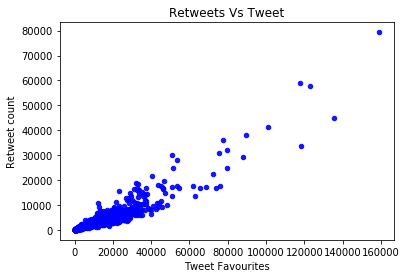

In [93]:
#Retweets vs. Favourites
master_df.plot(kind='scatter',x='tweet_favorites',y='retweet_count', alpha = 0.9, color = 'blue');
plt.xlabel('Tweet Favourites');
plt.ylabel('Retweet count');
plt.title('Retweets Vs Tweet');

The scatter plot above shows that the Retweet count and Favourite count are directly proportional.

##### Question 2 : Most popular dog name ?

In [94]:
master_df.dog_name.value_counts().nlargest(15)

Cooper     10
Oliver     10
Charlie    10
Lucy        9
Penny       9
Tucker      9
Winston     8
Sadie       8
Daisy       7
Toby        7
Lola        7
Koda        6
Bella       6
Jax         6
Stanley     6
Name: dog_name, dtype: int64

Most popular names are Cooper, Oliver and Charlie with 10 counts.

##### Question 3 : Most popular dog breed ?

In [95]:
master_df.dog_breed.value_counts().nlargest(15)

golden_retriever            158
Labrador_retriever          106
Pembroke                     95
Chihuahua                    91
pug                          62
toy_poodle                   50
chow                         48
Pomeranian                   42
Samoyed                      41
malamute                     33
Chesapeake_Bay_retriever     30
cocker_spaniel               30
French_bulldog               30
miniature_pinscher           25
Eskimo_dog                   22
Name: dog_breed, dtype: int64

Most popular dog breed is Golden Retriever with 158 counts.

##### Question 4 : Most rated dog?

In [96]:
dog_rated = master_df['rating_numerator'].sort_values(ascending=False).head(3)
print(dog_rated)

719     1776
1710     420
841      204
Name: rating_numerator, dtype: int64


In [97]:
master_df.query('rating_numerator=="1776"')

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,year,month,day,time,weekday,dog_stages,tweet_picture,dog_breed,confidence_level,tweet_favorites,retweet_count
719,749981277374128128,2016-07-04 15:00:45+00:00,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,2016,7,4,15:00:45,Mon,NaN,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,NaN,0.0,5223,2505


The most rated dog's name is Atticus

##### Image of the top rated dog

In [98]:
top_rated=master_df.query('rating_numerator=="1776"')['tweet_picture']
top_rated=list(top_rated)
Image(url= top_rated[0], width=300, height=200)

##### Question 5 : Most favorite dog ?

In [99]:
fav_dog = master_df['tweet_favorites'].sort_values(ascending=False).head(1)
print(fav_dog)

768    159086
Name: tweet_favorites, dtype: int64


In [100]:
master_df.query('tweet_favorites =="159086"')

,tweet_id,tweet_date,tweet_source,tweet_text,tweet_url,rating_numerator,rating_denominator,dog_name,year,month,day,time,weekday,dog_stages,tweet_picture,dog_breed,confidence_level,tweet_favorites,retweet_count
768,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13,10,NaN,2016,6,18,18:26:18,Sat,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,159086,79362


From above analysis the favorite dog name is not given.The favorite dog is in the breed: Labrador_retriever.

##### Image of most favorite dog ?

In [101]:
fav_dog_image=master_df.query('tweet_favorites=="159086"')['tweet_picture']
fav_dog_image=list(fav_dog_image)
Image(url= fav_dog_image[0], width=150, height=100)

##### Question 6 : Which stage are most dogs in?

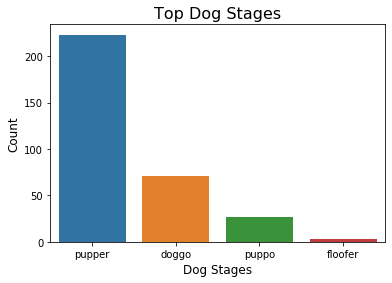

In [102]:
dog_stages = master_df['dog_stages'].value_counts()[0:7].index
sns.countplot(data = master_df, x = 'dog_stages', order = dog_stages, orient = 'h')
plt.xlabel('Dog Stages', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Top Dog Stages',fontsize=16)
plt.savefig('top-stages.png');

Most of the dogs are in pupper stage.

##### Question 7 : The most popular day to tweet?

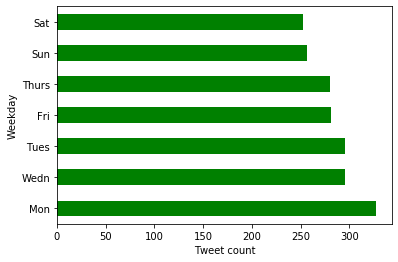

In [103]:
tweets = master_df['weekday'].value_counts()
tweets.plot(kind = 'barh', color='green')
plt.ylabel('Weekday')
plt.xlabel('Tweet count')
plt.savefig('weekdays.png');

The most popular day to tweet is Monday

##### Question 8 : The most popular month of tweet ?

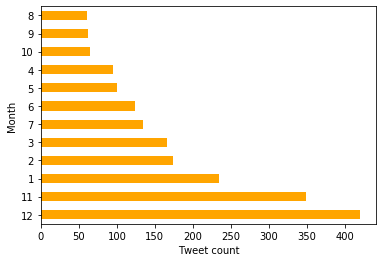

In [104]:
tweets_month = tweets = master_df['month'].value_counts()
tweets_month.plot(kind = 'barh', color='orange')
plt.xlabel('Tweet count')
plt.ylabel('Month')
plt.savefig('month-tweets.png');

The most popular month to tweet is December.

##### Question 9 : The most popular year of tweet ?

2016    971
2015    662
2017    353
Name: year, dtype: int64


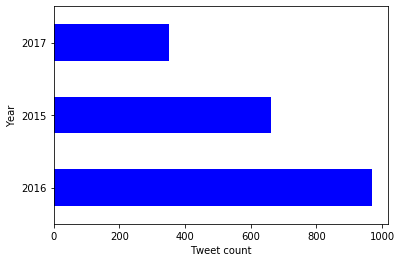

In [109]:
tweets_yr= tweets = master_df['year'].value_counts()
print(tweets_yr)
tweets_yr.plot(kind = 'barh', color='blue')
plt.xlabel('Tweet count')
plt.ylabel('Year')
plt.savefig('year-tweets.png');

The most popular year to tweet is 2016

##### Question 10 : Comapre favorites and retweets counts over the past 3 years ?

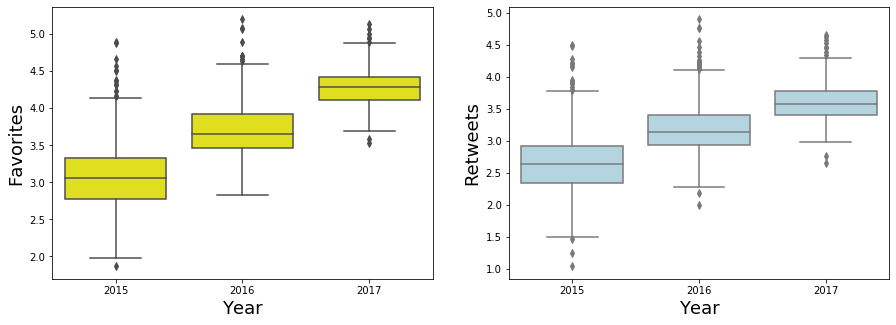

In [108]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(x = master_df['year'],y = np.log10(master_df['tweet_favorites']),ax = ax1,color='yellow');
ax1.set_xlabel('Year',fontsize = 18);
ax1.set_ylabel('Favorites',fontsize = 18);
sns.boxplot(x = master_df['year'], y = np.log10(master_df['retweet_count']),ax = ax2,color='lightblue');
ax2.set_xlabel('Year',fontsize = 18);
ax2.set_ylabel('Retweets',fontsize = 18);

From above figure,the favourite counts have increased over the years.

<a id='conclusion'></a>
## Conclusions

1.  From above scatter plot we can know that the Retweet count and Favourite count are directly proportional.
2.  Most popular names are Oliver, Charlie, Cooper and Lucy with 10 counts.
3.  Most popular dog breed are Golden Retriever.
4.  The most rated dog's name is Atticus
5.  The favorite dog's breed is Labrador Retriever.
6.  Most of the dogs are in pupper stage.
7.  Monday is the most popular to tweet.
8.  The most popular month to tweet is December.
9.  The most popular year to tweet is 2016.
10. Compared to Retweet count the Favourite counts have increased over the years.

<a id='resources'></a>
## Resources

- https://stackoverflow.com/questions/26075001/error-with-tweepy-oauthhandler
- https://stackabuse.com/reading-and-writing-json-to-a-file-in-python
- https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
